<a href="https://colab.research.google.com/github/penina26/GAN/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [35]:
from tensorflow.keras.datasets import mnist

In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

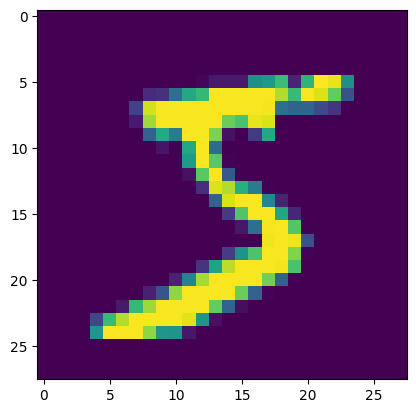

In [37]:
plt.imshow(X_train[0]);

In [38]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [39]:
only_zeros = X_train[y_train==0]

In [40]:
only_zeros.shape

(5923, 28, 28)

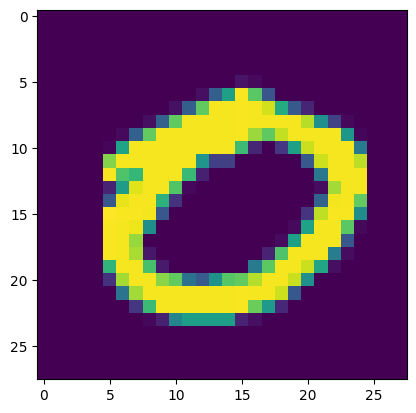

In [41]:
plt.imshow(only_zeros[14]);

Create the **Discriminator**

In [42]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=(28,28)))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))

discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

Create the **Generator**

In [43]:
codings_size = 100

generator = Sequential()
generator.add(Dense(100,activation='relu', input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

Creat the **Generative adversarial Network**

In [44]:
GAN = Sequential([generator, discriminator])

In [45]:
discriminator.trainable = False

In [46]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

**Train the GAN**

In [47]:
#setup a batch size
batch_size = 32
my_data = only_zeros

In [48]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [49]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [50]:
epochs = 30

In [51]:
#training loop
GAN.layers[0].summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 150)               15150     
                                                                 
 dense_11 (Dense)            (None, 784)               118384    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [52]:
GAN.layers[1].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 150)               117750    
                                                                 
 dense_7 (Dense)             (None, 100)               15100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [60]:
# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################
        
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # Generate numbers based just on noise input
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        # This gets rid of a Keras warning
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        
        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        
        # Avois a warning
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
	Currently on batch number 100 of 185
Currently on Epoch 2
	Currently on batch number 100 of 185
Currently on Epoch 3
	Currently on batch number 100 of 185
Currently on Epoch 4
	Currently on batch number 100 of 185
Currently on Epoch 5
	Currently on batch number 100 of 185
Currently on Epoch 6
	Currently on batch number 100 of 185
Currently on Epoch 7
	Currently on batch number 100 of 185
Currently on Epoch 8
	Currently on batch number 100 of 185
Currently on Epoch 9
	Currently on batch number 100 of 185
Currently on Epoch 10
	Currently on batch number 100 of 185
Currently on Epoch 11
	Currently on batch number 100 of 185
Currently on Epoch 12
	Currently on batch number 100 of 185
Currently on Epoch 13
	Currently on batch number 100 of 185
Currently on Epoch 14
	Currently on batch number 100 of 185
Currently on Epoch 15
	Currently on batch number 100 of 185
Currently on Epoch 16
	Currently on batch number 100 of 185
Currently on Epoch 17
	Currently on batch number 

In [61]:
noise = tf.random.normal(shape=[10, codings_size])

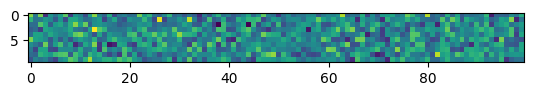

In [62]:
plt.imshow(noise);

In [63]:
images = generator(noise)

In [64]:
images.shape

TensorShape([10, 28, 28])

In [65]:
images[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

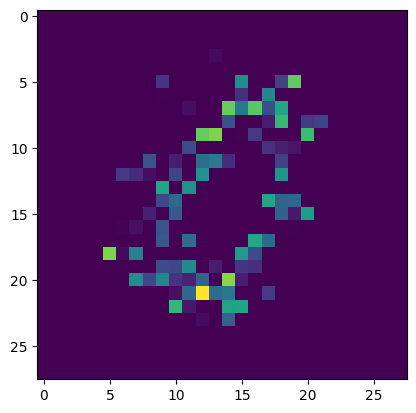

In [66]:
plt.imshow(images[0]);